# <span style="color:#8470FF">Fourier变换与Wavelet变换

### 要点：
* 快速傅里叶变换FFT可直接分离和处理特定频带，常用于信号去噪和滤波。

### <span style="color: #AA2299">函数和向量的内积

<blockquote>
内积定义为

$$\langle f(x),g(x)\rangle=\int_{a}^{b}f(x)g^*(x)dx$$
其中$x\in[a,b]$,
向量$f=[f_1,f_2,...f_n]^T$和$g=[g_1,g_2,...,g_n]^T$的内积定义为：

$$\langle f,g\rangle=\sum_{k=1}^{n}f_kg^*_k=\sum_{k=1}^{n}f(x_k)g^*(x_k)$$

0范数表示向量中非零元素的个数（即为其稀疏度），1范数表示为绝对值之和，而2范数则指模。
函数的2范数定义为

$$||f||_2=(\langle f,f\rangle)^{\frac{1}{2}}=(\int_{a}^{b}f(x)f^*(x)dx)^{\frac{1}{2}}$$



</blockquote>

### <span style="color: #AA2299">傅里叶级数
以L为周期的函数的傅里叶级数表示为

$$f(x)=\frac{a_0}{2}+\sum_{k=1}^{\infty}(a_k\cos(\frac{2\pi kx}{L})+b_k\sin (\frac{2\pi kx}{L}))$$

其中系数分别为

$$a_k=\frac{2}{L}\int_{0}^{L}f(x)\cos(\frac{2\pi kx}{L})dx$$

$$b_k=\frac{2}{L}\int_{0}^{L}f(x)\sin(\frac{2\pi kx}{L})dx$$

本质上说，傅里叶级数是一个函数将坐标变换到以sin,cos为基的坐标的表示方式。


### <span style="color: #AA2299">函数的傅里叶级数展开
##### <span style="color:#FF5577">注意函数`np.arange(start,stop,step)`和`np.linspace(start,stop,numbers)`的区别！

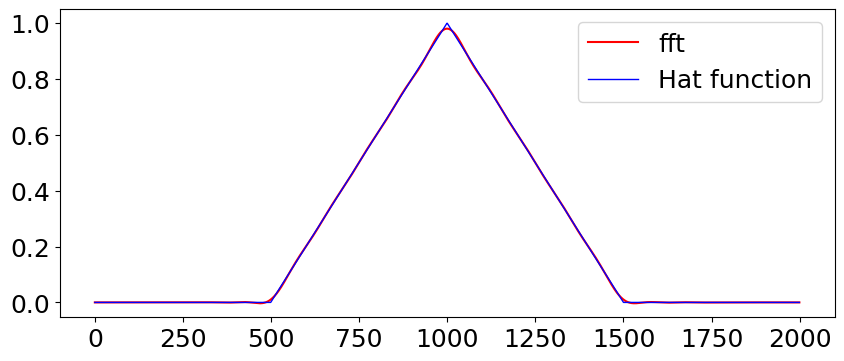

In [23]:
import numpy as np
import matplotlib.pyplot as plt

dx = 0.001
L = np.pi 
terms = 20
#np.arange()创建一个固定间隔的范围内的值
#但np.linspace()创建一个固定数目的范围内的值
x = L * np.arange(-1,1,dx) 
#x=np.linspace(-1,1,2000)
n = len(x) 
#把x范围划分为几段，每段长度为nquart
nquart = int(np.floor(n/4))
#np.zeros_like(x)创建一个与数组x形状相同的元素全为0的数组，免去再次获取x的长度以画图
f = np.zeros_like(x)
#定义函数
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)
#把f转化成形状和x相同的数组
A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0/2
A = np.zeros(terms)
B = np.zeros(terms)
for k in range(terms):
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
plt.figure(figsize=(10,4))
plt.plot(fFS,color='r',label='fft')
plt.plot(f,linewidth=1,color='b',label='Hat function')
plt.legend()
plt.show()

### <span style="color: #AA2299">傅里叶变换
正变换

$$F(\omega)=\int_{-\infty}^{+\infty}f(x)e^{-i\omega x}dx$$

逆变换

$$f(x)=\frac{1}{2\pi}\int_{-\infty}^{+\infty}F(\omega)e^{i\omega x}d\omega$$

以及各种性质。

### <span style="color: #AA2299">离散傅里叶变换(DFT)
正变换

$$\mathcal{F_k}=\sum_{j=0}^{n-1}f_je^{-i2\pi jk/n}$$

逆变换
$$f_k=\frac{1}{n}\sum_{j=0}^{n-1}\mathcal{F_j}e^{i2\pi jk/n}$$




C:\Users\Remilia Scarlet\AppData\Local\Temp\ipykernel_6332\1746392848.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  DFT[i,k]=  w**(i*k)


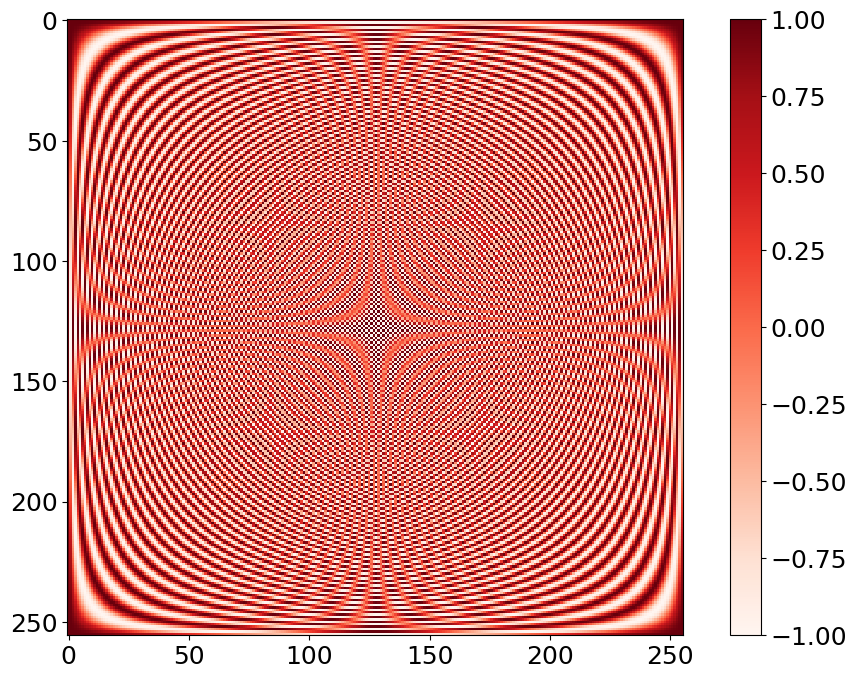

In [24]:
n = 256
w = np.exp(-1j * 2 * np.pi/n )
#慢变换
DFT = np.zeros((n, n))  
for i in range(n):
    for k in range(n):
        DFT[i,k]=  w**(i*k)
DFT = np.real(DFT)
#快变换
J,K = np.meshgrid(np.arange(n),np.arange(n))
DFT = np.power(w,J*K)
DFT = np.real(DFT)
#用热力图的形式画出来
plt.imshow(DFT,cmap='Reds', interpolation='nearest')
plt.colorbar() # 添加颜色条
plt.show()

### <span style="color: #AA2299">快速傅里叶变换(FFT)


In [25]:
fhat = np.fft.fft(f)  #快速正变换
f = np.fft.ifft(fhat) #快速逆变换
print('fhat=',fhat)
print('f=',f)

fhat= [ 501.        +0.j         -405.92068715-0.63761925j
  202.64103395+0.63661768j ...  -44.81876549+0.21120502j
  202.64103395-0.63661768j -405.92068715+0.63761925j]
f= [ 2.84217094e-17+2.47198095e-20j -1.13686838e-16+1.54737334e-18j
  5.68434189e-17-5.35873429e-17j ... -1.70530257e-16-5.33875813e-18j
  1.70530257e-16+7.10946688e-17j  0.00000000e+00+4.82561659e-17j]


#### <span style="color: #AA2299">使用FFT进行滤波去噪
##### <span style="color:#8470FF">注意功率谱密度和相应的横坐标频率的创建

c:\Users\Remilia Scarlet\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Remilia Scarlet\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


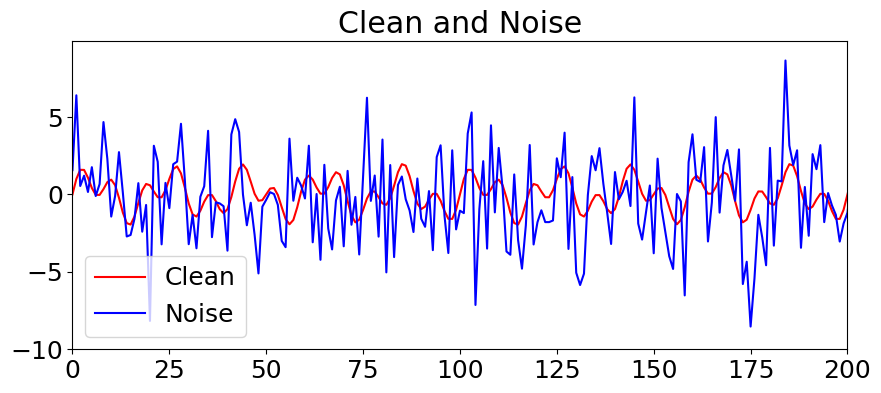

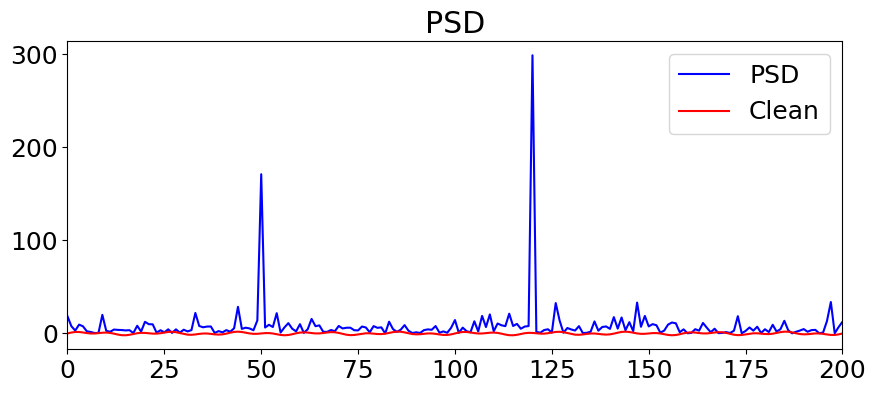

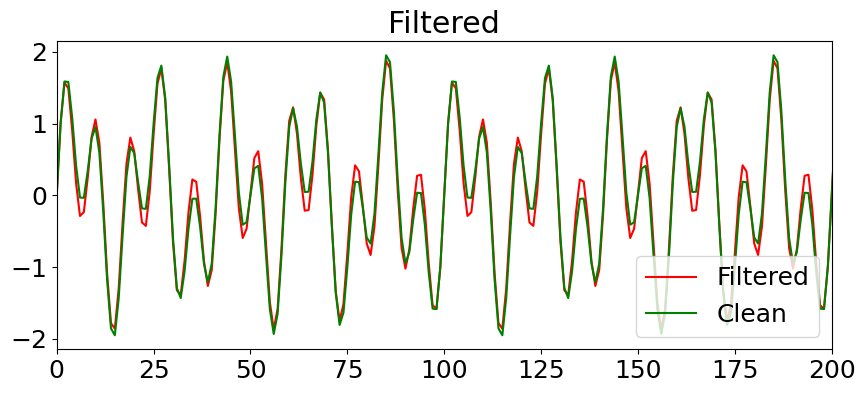

In [26]:
'''对freq的理解：有n=1000个点，即1000Hz，画图查看主要的频率成分在哪里'''
dt = 0.001
t = np.arange(0,1,dt)
#假设我们给一个信号以高斯白噪声
f_clean = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f = f_clean + 2.5*np.random.randn(len(t))
n = len(t)
#计算FFT
fhat = np.fft.fft(f,n)
#计算功率谱密度
'''平均到0~1000的频率上计算主要成分'''
PSD = fhat *np.conj(fhat) / n
#创建x坐标以画PSD图
'''实际上freq就是0~1000范围，创建了一个横坐标而已'''
freq = (1/(dt*n)) * np.arange(n) 

#采用PSD阈值滤波,用傅里叶逆变换得到去噪后的波形
indices = PSD > 100
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

#可视化
plt.figure(figsize=(10,4))
plt.xlim(0,200)
plt.plot(f_clean,'r',label='Clean')
plt.plot(f,'b',label='Noise')
plt.title('Clean and Noise')
plt.legend()

plt.figure(figsize=(10,4))
plt.xlim(0,200)
plt.plot(freq,PSD,'b',label='PSD')
plt.plot(f_clean,'r',label='Clean')
plt.title('PSD')
plt.legend()

plt.figure(figsize=(10,4))
plt.xlim(0,200)
plt.plot(ffilt,'r',label='Filtered')
plt.plot(f_clean,'g',label='Clean')
plt.title('Filtered')
plt.legend()

plt.show()

### <span style="color: #AA2299">用傅里叶变换进行数值微分
我们知道有这样的性质：

$$\mathcal{F}(\frac{df}{dx})=i\omega \mathcal{F}(f)$$

这样我们只用求出$\mathcal{F}(f)$之后，对$i\omega\mathcal{F}(f)$作傅里叶逆变换即可求出微分，其中$\omega=\frac{2\pi}{T}$

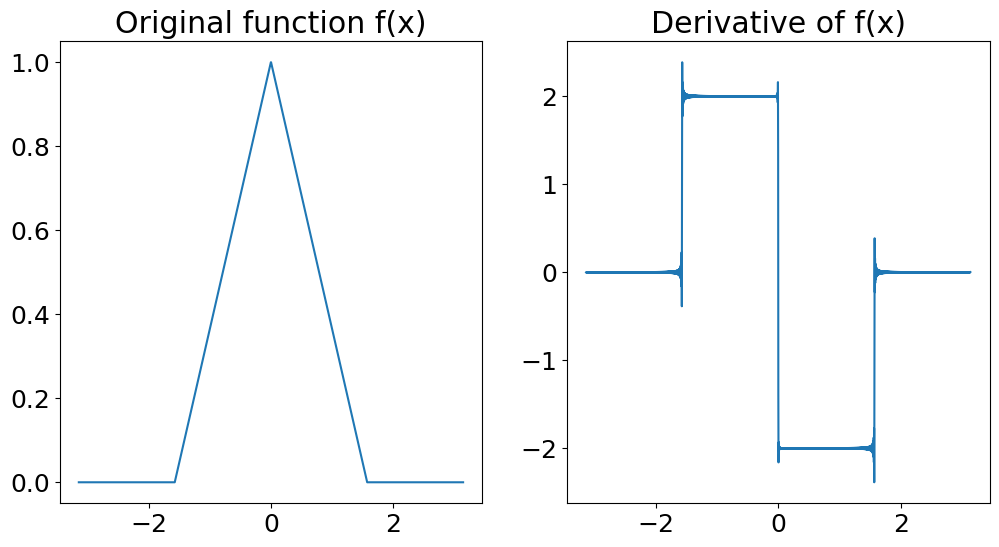

In [27]:
import numpy as np  
import matplotlib.pyplot as plt  
import math

# 原始参数  
dx = 0.001  
L = np.pi   
x = L * np.arange(-1, 1, dx)   
n = len(x)   
nquart = int(np.floor(n / 4))  
# 定义 f  
f = np.zeros_like(x)  
f[nquart:2*nquart] = (4/n) * np.arange(1, nquart + 1)  
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n) * np.arange(0, nquart)  

# 进行傅里叶变换  
F = np.fft.fft(f)  
# 计算频率  
freq = np.fft.fftfreq(n, d=dx)  
# 创建微分  
dF = 1j * 2 * np.pi * freq * F  
# 反变换回时域  
df = np.fft.ifft(dF)  
# 绘图  
plt.figure(figsize=(12, 6))  

plt.subplot(1, 2, 1)  
plt.plot(x, f)  
plt.title("Original function f(x)")  

plt.subplot(1, 2, 2)  
plt.plot(x, df.real)  # 取实部  
plt.title("Derivative of f(x)")  

plt.show()

### <span style="color: #AA2299">用傅里叶变换求解PDE

**以热传导方程为例**

$$u_t=a^2u_{xx}$$

变换得到

$$U_t=-a^2\kappa ^2U$$



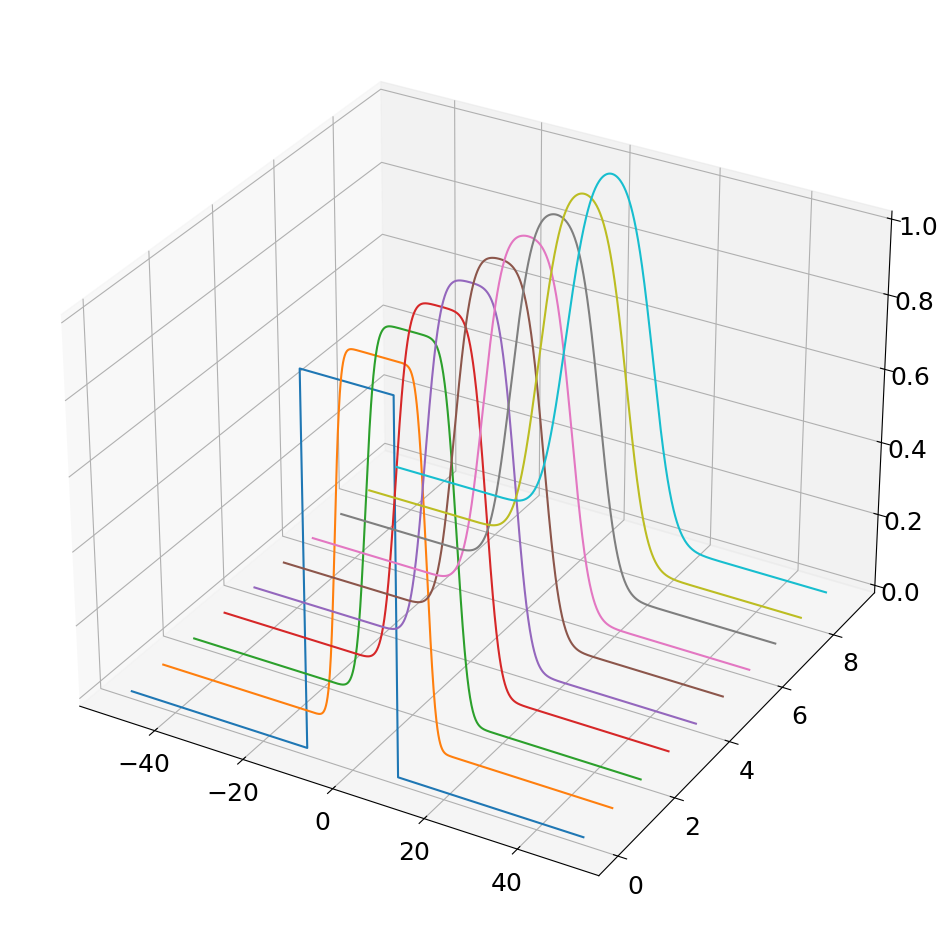

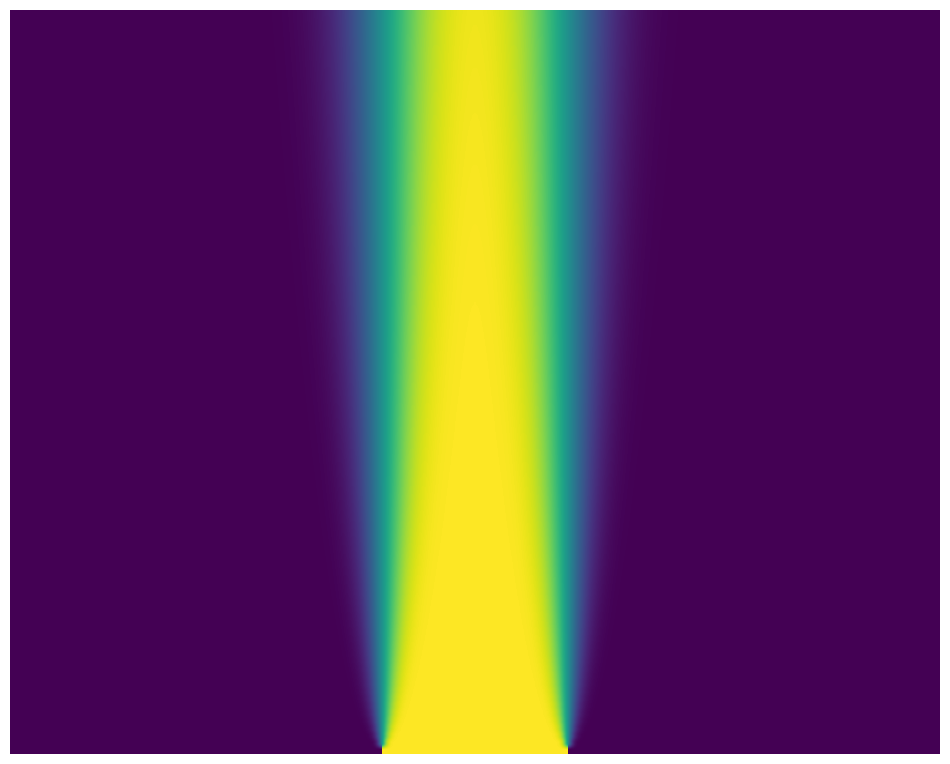

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})
'''定义基本参数'''  
a = 1    # Thermal diffusivity constant
L = 100  # Length of domain
N = 1000 # Number of discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx) # Define x domain
# Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)
# Initial condition
u0 = np.zeros_like(x)
u0[int((L/2 - L/10)/dx):int((L/2 + L/10)/dx)] = 1
u0hat = np.fft.fft(u0)

'''
由于odeint函数不能接受复数类型的参数，故用np.concatenate()将实部和虚部连接起来,
原来是N维复数组，连接后变成2N维实数组。
'''
u0hat_ri = np.concatenate((u0hat.real,u0hat.imag))

# Simulate in Fourier frequency domain
dt = 0.1
t = np.arange(0,10,dt)

'''定义函数'''
def rhsHeat(uhat_ri,t,kappa,a):
    '''此处将实部[:N]和虚部[N:]连接起来'''
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -a**2 * (np.power(kappa,2)) * uhat
    d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri

'''用odeint求解ODE并作逆变换后取实部'''
uhat_ri = odeint(rhsHeat, u0hat_ri, t, args=(kappa,a))
uhat = uhat_ri[:,:N] + (1j) * uhat_ri[:,N:]
u = np.zeros_like(uhat)
for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])
u = u.real    

'''画图'''
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:])
    
plt.figure()
plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.show()

### <span style="color: #AA2299">Garbor变换

又称短时傅里叶变换(STFT),傅里叶变换适用于处理周期性平稳信号，非平稳信号的处理，适合Garbo变换，在一个滑动窗口内计算FFT。
STFT定义为

$$\mathcal{G}(t,\omega )=\int_{-\infty}^{\infty}f(\tau)e^{-i\omega  \tau}g^*(\tau -t)d\tau=\langle f,g_{t,\omega}\rangle$$

而$g_{t,\omega}(\tau)$定义为

$$g_{t,\omega}=e^{i\omega \tau}g(\tau -t)$$

其共轭量在指数上加负号。
另外，a表示短时窗口的速度，$\tau$决定了移动窗口的中心
逆变换为

$$f(t)=\frac{1}{2\pi ||g||^2}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\mathcal{G(\tau , \omega)}g(t-\tau)e^{i\omega t}d\omega dt$$



用频谱图的形式画出来


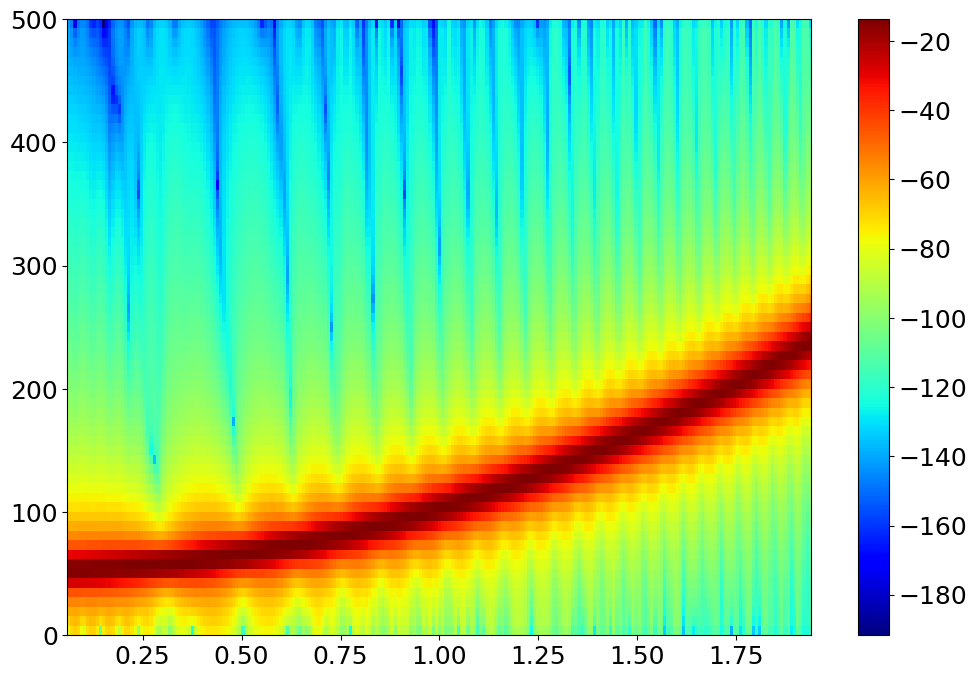

In [29]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

dt = 0.001
t = np.arange(0,2,dt)
f0 = 50
f1 = 250
t1 = 2
x = np.cos(2*np.pi*t*(f0 + (f1-f0)*np.power(t,2)/(3*t1**2)))

plt.specgram(x, NFFT=128, Fs=1/dt, noverlap=120,cmap='jet')
plt.colorbar()
plt.show()

### <span style="color: #AA2299">拉普拉斯变换

正变换
$$\mathcal{L(f(t))}=\int_{0}^{\infty}f(t)e^{-st}dt$$

逆变换
$$f(t)=\frac{1}{2\pi i}\int_{\gamma -i\infty}^{\gamma +i\infty}\mathcal{L(f(t))}e^{st}ds$$

其中，$s=\gamma+i\omega$

利用其微分性质

$$\mathcal{L(\frac{df(t)}{dt})}=-f(0)+s\mathcal{L(f(s))}$$

$$\mathcal{L(\frac{d^2f(t)}{dt^2})}=-f^\prime(0)-sf(0)+s^2\mathcal{L(f(s))}$$

$$......$$

$$\mathcal{L(\frac{d^nf(t)}{dt^n})}=-f^{(n-1)}(0)-sf^{(n-2)}(0)-...-s^{n-1}f(0)+s^n\mathcal{L(f(s))}$$

以及延时性质

$$\mathcal{L(e^{\lambda t})}=\frac{1}{s-\lambda}$$

可以求解微分方程

例如，方程 $$\ddot x+a\dot x+bx=0$$ 
设$x(0)=x_0\quad,\quad \dot x(0)=v_0$
变换后得到 

$$s^2\mathcal{L(x(s))}-sx_0-v_0+as\mathcal{L(x(s))}-ax_0+b\mathcal{L(x(s))}=0$$

解出$\mathcal{L(x)}$ 再逆变换即可。



### <span style="color: #AA2299">小波变换

连续小波变换(CWT)定义为

$$\mathcal{W_\psi(f)(a,b)}=\langle f,\psi_{a,b}\rangle=\int_{-\infty}^{\infty}f(t)\psi^*_{a,b}(t)dt$$

其中a,b是改变$\psi$伸缩和平移的参数

连续小波逆变换(iCWT)定义为

$$f(t)=\frac{1}{C_\psi}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\mathcal{W_\psi(f)(a,b)}\psi_{a,b}(t)\frac{1}{a^2}dadb$$

**如果$\psi$是一个小波，$\phi$是一个有界可积函数，则新的小波可以由卷积$\psi*\phi$产生**

为便于数值计算，我们常采用离散小波变换(DWT),定义为

$$\mathcal{W_\psi(f)(j,k)}=\langle f,\psi_{j,k}\rangle=\int_{-\infty}^{\infty}f(t)\psi^*_{j,k}(t)dt$$

好像没什么区别，但$\psi_{j,k}(t)$是一个离散小波族

$$\psi_{j,k}(t)=\frac{1}{a^j}\psi(\frac{t-kb}{a^j})$$

如果这些族是正交的，那么可以把任意函数写成其线性叠加的形式

$$f(t)=\sum_{j,k=-\infty}^{\infty}\langle f(t),\psi_{j,k}(t)\rangle \psi_{j,k}(t)$$








### <span style="color: #AA2299">二维傅里叶变换

将第一个矩阵的每一行作1D傅里叶变换，第二个矩阵每一列作1D傅里叶变换，再相乘。

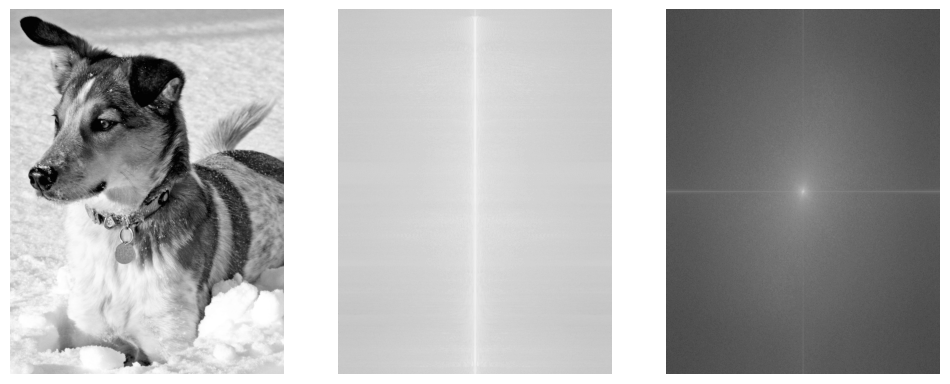

In [30]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})
'''读取图像数据'''
A = imread(os.path.join('..','Jupyter笔记','DATA','dog.jpg'))
'''计算数组A在颜色通道(索引-1)的均值，变成灰度图像'''
B = np.mean(A, -1); # Convert RGB to grayscale
fig,axs = plt.subplots(1,3)
'''axs[i]表示子图对应序号，012分别为从左到右的子图'''
img = axs[0].imshow(B) #画出原始图像
img.set_cmap('gray')
axs[0].axis('off')

'''逐行计算FFT，用C表示'''
Cshift = np.zeros_like(B,dtype='complex_')
C = np.zeros_like(B,dtype='complex_')
for j in range(B.shape[0]): #shape[0]表示B的第一个维度长度，即行数
    Cshift[j,:] = np.fft.fftshift(np.fft.fft(B[j,:]))
    C[j,:] = np.fft.fft(B[j,:])

'''画出进行逐列变换的图像'''    
img = axs[1].imshow(np.log(np.abs(Cshift)))
img.set_cmap('gray')
axs[1].axis('off')

'''逐列计算FFT，用D表示'''
D = np.zeros_like(C)
for j in range(C.shape[1]): #shape[1]表示C的第二个维度长度，即列数
    D[:,j] = np.fft.fft(C[:,j])
'''画出相乘后的图像'''
img = axs[2].imshow(np.fft.fftshift(np.log(np.abs(D))))
img.set_cmap('gray')
axs[2].axis('off')

plt.show()


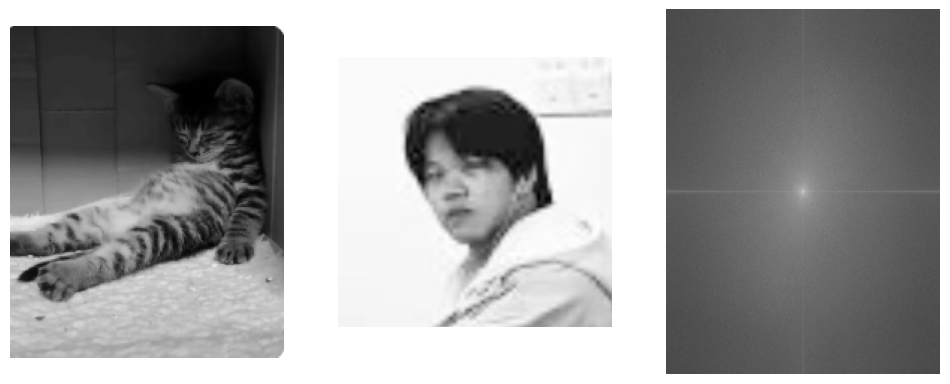

In [35]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})
'''读取图像数据'''
A1 = imread(os.path.join('..','Jupyter笔记','DATA','cat.png'))
A2 = imread(os.path.join('..','Jupyter笔记','DATA','周蛋辰.png'))

'''计算数组A在颜色通道(索引-1)的均值，变成灰度图像'''
B1 = np.mean(A1, -1); # Convert RGB to grayscale
B2 = np.mean(A2, -1); # Convert RGB to grayscale
fig,axs = plt.subplots(1,3)

'''axs[i]表示子图对应序号，012分别为从左到右的子图'''
img = axs[0].imshow(B1) #画出原始图像
img.set_cmap('gray')
axs[0].axis('off')

'''画出进行逐列变换的图像'''    
img = axs[1].imshow(np.log(np.abs(B2)))
img.set_cmap('gray')
axs[1].axis('off')

'''或者直接用函数fft2即可'''
D = np.fft.fft2(B)

'''画出相乘后的图像'''
img = axs[2].imshow(np.fft.fftshift(np.log(np.abs(D))))
img.set_cmap('gray')
axs[2].axis('off')

plt.show()